In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'1.2.1'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print('Size of:')
print('-Training-set:\t\t{}'.format(len(data.train.labels)))
print('-Test-set:\t\t{}'.format(len(data.test.labels)))
print('-Validation-set:\t{}'.format(len(data.validation.labels)))

Size of:
-Training-set:		55000
-Test-set:		10000
-Validation-set:	5000


In [5]:
data.test.labels[0:6,:]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [6]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [7]:
data.test.cls[0:6]

array([7, 2, 1, 0, 4, 1], dtype=int64)

In [8]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images)==len(cls_true)== 9
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = 'True: {0}'.format(cls_true[i])
        else:
            xlabel = 'True: {0}, Pred: {1}'.format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])            

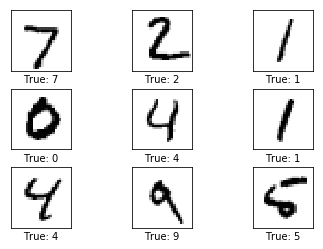

In [10]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images, cls_true=cls_true)

In [11]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [12]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [13]:
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [14]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [16]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
session = tf.Session()
session.run(tf.global_variables_initializer())
batch_size = 100

In [18]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x:x_batch, y_true:y_true_batch}
        session.run(optimizer, feed_dict=feed_dict_train)

In [19]:
feed_dict_test = {x:data.test.images, y_true:data.test.labels, y_true_cls:data.test.cls}

In [20]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print('Accuracy on test-set:{0:.1%}'.format(acc))

In [21]:
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [22]:
def plot_example_errors():
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]    
    cls_true = data.test.cls[incorrect]      
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [32]:
def plot_weights():
    w = session.run(weights)
    w_min = np.min(w)
    w_max = np.max(w)
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        if i<10:
            image = w[:, i].reshape(img_shape)
            ax.set_xlabel('Weights：{0}'.format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])

In [24]:
print_accuracy()

Accuracy on test-set:9.8%


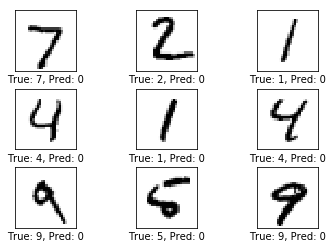

In [25]:
plot_example_errors()

In [26]:
optimize(num_iterations=1)

In [27]:
print_accuracy()

Accuracy on test-set:13.9%


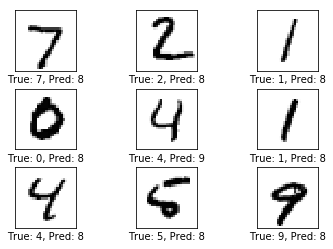

In [28]:
plot_example_errors()

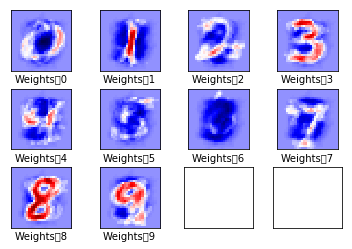

In [33]:
plot_weights()

In [34]:
optimize(num_iterations=9)

In [35]:
print_accuracy()

Accuracy on test-set:65.2%


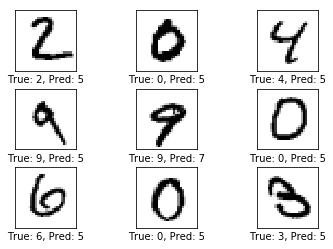

In [36]:
plot_example_errors()

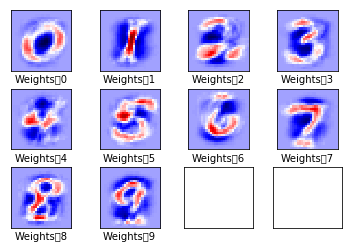

In [37]:
plot_weights()

In [38]:
optimize(num_iterations=990)

In [39]:
print_accuracy()

Accuracy on test-set:91.6%


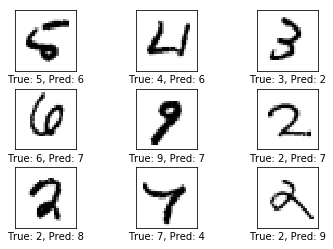

In [40]:
plot_example_errors()

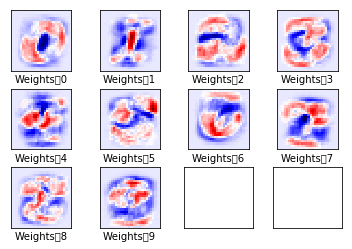

In [41]:
plot_weights()

[[ 953    0    1    3    0    5   11    4    3    0]
 [   0 1107    2    2    0    1    4    2   17    0]
 [   8   11  877   27   12    1   15   18   53   10]
 [   3    1   11  937    0   10    1   13   27    7]
 [   1    1    2    2  900    0   13    2    9   52]
 [  10    3    1   55    9  720   18   10   55   11]
 [   8    3    3    2    9   12  912    3    6    0]
 [   1    9   16    9    8    0    0  949    3   33]
 [   4    6    5   24    9   15    9   13  882    7]
 [   9    5    1   12   18    4    1   29   12  918]]


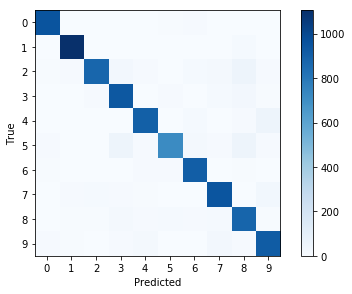

In [42]:
print_confusion_matrix()

In [43]:
session.close()